<a href="https://colab.research.google.com/github/milenoepifanio/Exploratorio_Titanic/blob/main/An%C3%A1lise_Explorat%C3%B3ria_do_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Esse pequeno projeto tem como objetivo analisar a base de dados de passageiros do titanic, disponível em -> https://www.kaggle.com/competitions/titanic/data?select=train.csv


Dicionário de Variáveis encontradas na base:

*  PassengerID: Número de identificação do passageiro
*  Survived: Informa se o passageiro sobreviveu ao naufrágio
*  PCclass: Classe do bilhete
*  Name: Nome do passageiro
*  Sex: Sexo do passageiro
*  Age: Idade do passageiro
*  SibSp: Quantidade de cônjuges e/ou irmãos a bordo
*  Parch: Quantidade de pais e filhos a bordo
*  Ticket: Número da passagem
*  Fare: Preço da passagem
*  Cabin: Número da cabine do passageiro
*  Embarked: Porto de embarque: (C = Cherbourg; Q = Queenstown; S = Southampton)



Antes de tudo, é necessário realizar o import das bibliotecas necessárias e a da base utilizada, que foi realizado upload na minha conta pessoal do Google Drive.

O RSM Titanic é provavelmente o naufragio mais famoso do mundo, e não somente pelo filme do James Cameron, protagonizado por Leonardo DiCaprio e Kate Winslet, em 1997.

A embarcação era operada pela White Star Line e custou aproximadamente GB£ 1,5 milhões na década passada, que atualmente, pode ser convertido em £ 140 milhões em 2016. O návio era considerado como "Inafuldável" durante sua de Southampton, Reino Unido, com objetivo de chegar e Nova York, Estados Unidos, pertencendo a classe *Olympic*. Estavam a bordo 2224 pessoas, que sofreram pelo atingimento contra um iceberg às 23h40min do dia 14 de abril e afundou na madrugada do dia seguinte, resultando na morte de 68,1% dos passageiros.

O navio foi procurado por anos, até ser encontrado em 1985, a uma distância de 650km ao sudeste de Terra Nova no Canadá em uma profundidade de 3843 metros.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

dados = pd.read_excel('/content/drive/MyDrive/base_titanic.xlsx')

Inicialmente, faço a checagem do tipo de dado das colunas presentes na base, assim como uma contagem de valores e um describe, visando conhecimento de base

In [2]:
dados.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [3]:
dados.dtypes.value_counts()

int64      5
object     5
float64    2
dtype: int64

In [4]:
print(dados.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch          Fare  
count  891.000000  8.910000e+02  
mean     0.381594  1.271697e+05  
std      0.806057  4.112720e+05  
min      0.000000  0.000000e+00  
25%      0.000000  1.445000e+01  
50%      0.000000  7.100000e+01  
75%      0.000000  7.895800e+04  
max      6.000000  5.123292e+06  


Por alguns count de colunas retornaram um valor abaixo do esperado (891), é preciso checar quantos valores são não nulos nas colunas

In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
dados.isnull().sum().sort_values(ascending=False).head(10)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
dtype: int64

In [7]:
dados['Age'].round().value_counts()

24.0    32
22.0    27
28.0    27
30.0    27
18.0    26
        ..
53.0     1
80.0     1
12.0     1
0.0      1
74.0     1
Name: Age, Length: 71, dtype: int64

In [8]:
dados['Pclass'].value_counts().sort_values(ascending = False)

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [9]:
dados.nunique().sort_values(ascending=False)

## Vemos que as abas de Name e Ticket e Cabin sempre serão diferentes e não ajudam em nada

PassengerId    891
Name           891
Ticket         681
Fare           247
Cabin          147
Age             88
SibSp            7
Parch            7
Pclass           3
Embarked         3
Survived         2
Sex              2
dtype: int64

In [10]:
dados2 = dados.drop(['Name', 'Ticket', 'Cabin'],axis=1)
dados2.head()

#Retirando os campos que não auxiliam

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.25,S
1,2,1,1,female,38.0,1,0,712833.00,C
2,3,1,3,female,26.0,0,0,7925.00,S
3,4,1,1,female,35.0,1,0,53.10,S
4,5,0,3,male,35.0,0,0,8.05,S


In [11]:
dados2.nunique().sort_values(ascending=False)

PassengerId    891
Fare           247
Age             88
SibSp            7
Parch            7
Pclass           3
Embarked         3
Survived         2
Sex              2
dtype: int64

In [12]:
dados2.Age.mean()
# Descobrindo a média de idade

29.69911764705882

In [13]:
dados2.loc[dados2.Age.isnull(),'Age'] = dados2.Age.mean()

# Atribuindo a idade média a quem tem idade null

In [14]:
dados['Age'] = dados2.Age.astype(int)

#Transformando Age em Inteiro, para facilitar a criação de gráficos no futuro.

In [15]:
# Verificar os valores mais frequentes na Embarked

dados2.Embarked.value_counts()

# Descobrimos a moda e atribuimos ele a quem  é vázio

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [16]:
dados2.loc[dados2.Embarked.isnull(),'Embarked'] = dados2.Embarked.mode()[0]
#Erro tá aqui, ele deveria subtituir por 'S' em vez de 'Sim'

In [17]:
dados2.isnull().sum().sort_values(ascending=False).head(10)

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [18]:
dados2['Sobreviveu?'] = dados2['Survived'].replace([0,1],['Não','Sim'])
dados2['Sobreviveu?'].value_counts()

Não    549
Sim    342
Name: Sobreviveu?, dtype: int64

In [19]:
print("A idade média dos tripulantes é de: {0}".format(dados2['Age'].mean()))
print("A classe média dos tripulantes é de: {0}".format((dados2['Pclass']).mean()))
print("Portão mais utilizado para embarque: {0}".format(dados2['Embarked'].mode()))

A idade média dos tripulantes é de: 29.69911764705882
A classe média dos tripulantes é de: 2.308641975308642
Portão mais utilizado para embarque: 0    S
Name: Embarked, dtype: object


In [20]:
print(dados2.groupby('Sex')['Sobreviveu?'].value_counts())

Sex     Sobreviveu?
female  Sim            233
        Não             81
male    Não            468
        Sim            109
Name: Sobreviveu?, dtype: int64


<Axes: xlabel='Age'>

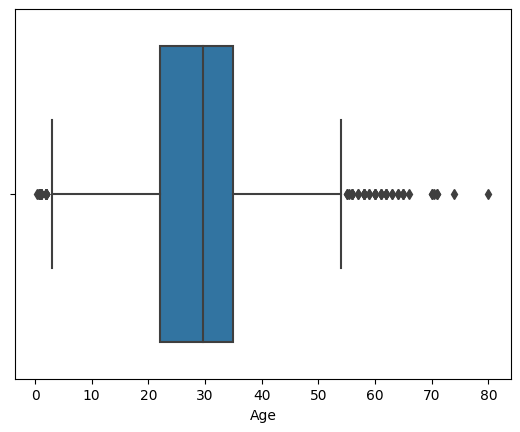

In [21]:
sns.boxplot(x='Age',
            data = dados2)

<Axes: xlabel='Sobreviveu?', ylabel='Age'>

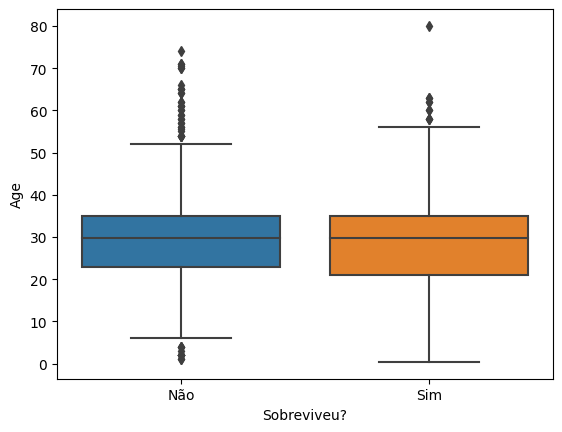

In [22]:
sns.boxplot(y='Age',
            x = 'Sobreviveu?',
            data = dados2)

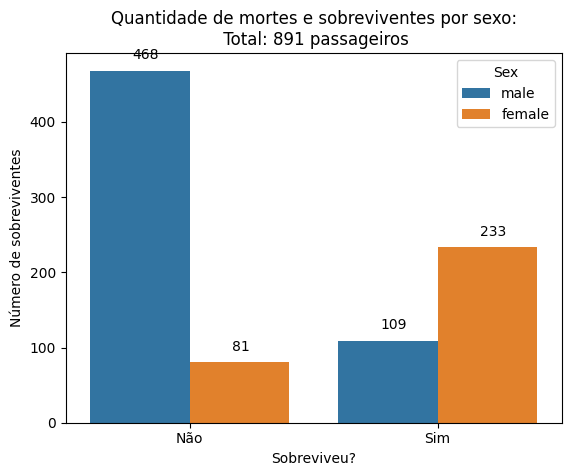

In [23]:
passagers = sns.countplot(data = dados2, x ='Sobreviveu?', hue = 'Sex')
for p in passagers.patches:
  b =p.get_bbox()
  passagers.annotate("{:.0f}".format(b.y1+b.y0),((b.x0 + b.x1)/2 -0.03,b.y1+15))


plt.title('Quantidade de mortes e sobreviventes por sexo:\n Total: %s passageiros' %(dados2.shape[0]))
plt.xlabel('Sobreviveu?')
plt.ylabel('Número de sobreviventes')
plt.show()

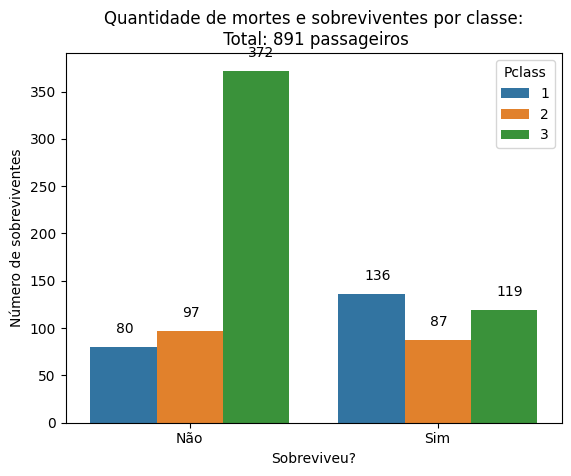

In [24]:
passagers = sns.countplot(data = dados2, x ='Sobreviveu?', hue = 'Pclass')
for p in passagers.patches:
  b =p.get_bbox()
  passagers.annotate("{:.0f}".format(b.y1+b.y0),((b.x0 + b.x1)/2 -0.03,b.y1+15))


plt.title('Quantidade de mortes e sobreviventes por classe:\n Total: %s passageiros' %(dados2.shape[0]))
plt.xlabel('Sobreviveu?')
plt.ylabel('Número de sobreviventes')
plt.show()

In [25]:
print(dados2.groupby('Embarked')['Sobreviveu?'].value_counts())

Embarked  Sobreviveu?
C         Sim             93
          Não             75
Q         Não             47
          Sim             30
S         Não            427
          Sim            219
Name: Sobreviveu?, dtype: int64


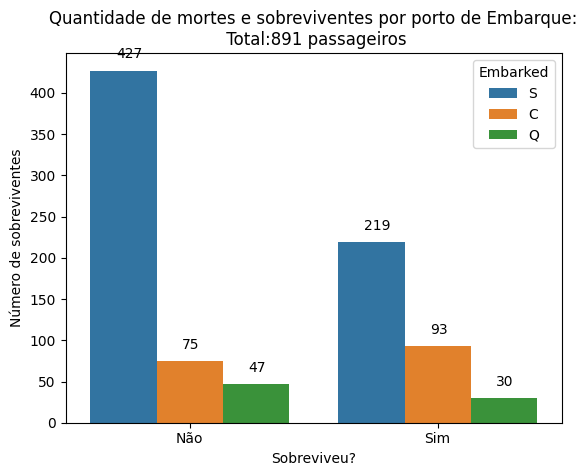

In [26]:
passagers = sns.countplot(data = dados2, x ='Sobreviveu?',hue = 'Embarked')
for p in passagers.patches:
  b =p.get_bbox()
  passagers.annotate("{:.0f}".format(b.y1+b.y0),((b.x0 + b.x1)/2 -0.03,b.y1+15))


plt.title('Quantidade de mortes e sobreviventes por porto de Embarque:\n Total:%s passageiros' %(dados2.shape[0]))
plt.xlabel('Sobreviveu?')
plt.ylabel('Número de sobreviventes')
plt.show()

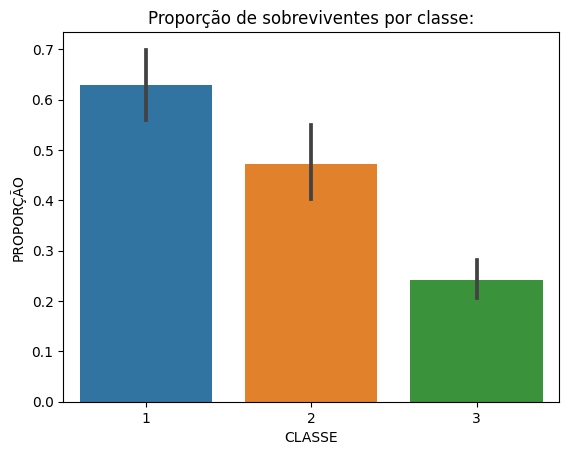

In [27]:
sobreviventes_classe = dados2.copy()
sobreviventes_classe['Sobreviveu?'] = dados2['Sobreviveu?'] == 'Sim'

sns.barplot(data=sobreviventes_classe, y='Sobreviveu?', x='Pclass')
plt.title('Proporção de sobreviventes por classe:')
plt.ylabel('PROPORÇÃO')
plt.xlabel('CLASSE')
plt.show()

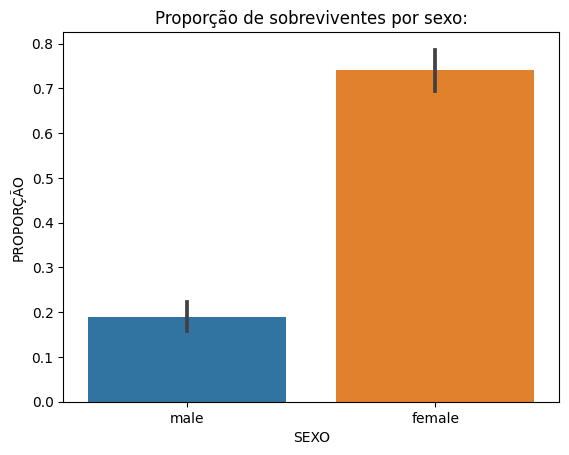

In [28]:
sobreviventes_sexo = dados2.copy()
sobreviventes_sexo['Sobreviveu?'] = dados2['Sobreviveu?'] == 'Sim'

sns.barplot(data=sobreviventes_sexo, y='Sobreviveu?', x='Sex')
plt.title('Proporção de sobreviventes por sexo:')
plt.ylabel('PROPORÇÃO')
plt.xlabel('SEXO')
plt.show()

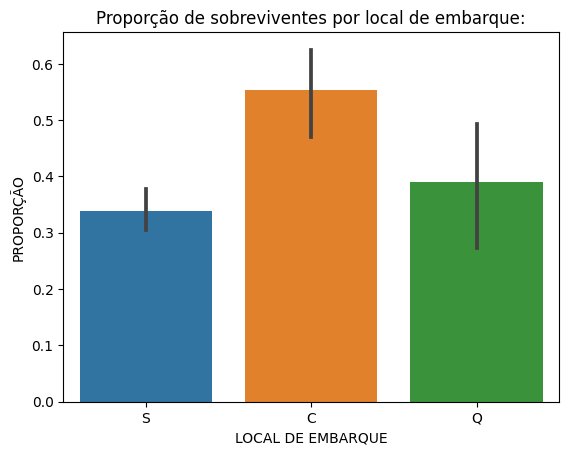

In [29]:
sobreviventes_embarque = dados2.copy()
sobreviventes_embarque['Sobreviveu?'] = dados2['Sobreviveu?'] == 'Sim'

sns.barplot(data=sobreviventes_embarque, y='Sobreviveu?', x='Embarked')
plt.title('Proporção de sobreviventes por local de embarque:')
plt.ylabel('PROPORÇÃO')
plt.xlabel('LOCAL DE EMBARQUE')
plt.show()

# Conclusões


Com base no desenvolvimento deste pequeno projeto, os insights retirados são os de que:

* A média de idade da base é de 29 anos, com 75% dos viajantes na faixa de 35 anos, aproximadamente;
* Dentre os sobreviventes, aproximadamente 80% eram do sexo feminino;
  * Isso é um reflexo da premissa de salvamento de mulheres e crianças primeiro, que foi uma prática adotada no procedimento de salvamento do Titanic.
* A classe que conseguiu ser salva com uma maior taxa de sucesso foi a primeira classe (60%), enquanto a menos favorecida foi a terceira (~25%).
  * Isso é explicado pela pouca quantidade de botes e a preferência na fila de priorização e preenchimento dos botes, que eram insuficientes para todos os coupantes do návio. Outro fato que influenciou é que a própria equipe de tripulantes do Titanic impediu que a terceira classe tivesse ;
* A cidade com maior proporção de sobreviventes foi Cherbourg (C), na França, seguido por Queenstown (Q), na Irlanda.
  * Isso é reflexo de que os embarcados nessas cidades estavam na primeira classe, em sua maioria, representando maior poder financeiro.
* A classe média da base é 2.3, o que significa que havia uma maior concentração de pessoas nas classes 2 e 3 do que na primeira classe;

## Próximos passos

Mesmo sendo uma análise considerada simples, foi possível entender mais sobre a base e justificar as ações já conhecidos pela história do Titanic. Como próximos passos, é possível desenvolver técnicas de Machine Learning para criar um modelo mais robusto acerca d otema.
É importante também destacar que a base não é completa (com dados de todos os usuários que estavam envolvidos nos acidentes), o que pode influenciar um pouco os resultados finais, pois é somente uma amostra.